<h1 style="font-weight:bold;margin-bottom:0.2em;">Exploring and Analyzing Final Storm Event Data</h1>


The goal of this notebook is to explore and analyze the final storm events database from [NOAA NCEI](https://www.ncei.noaa.gov/stormevents/ftp.jsp). 
This is an extensive dataset that extends from 1950 to 2024, and includes a host of variables that can be seen [here](https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf). There is a clear bias, where the earlier years have considerably fewer reports, especially prior to the 1990s when NEXRAD radar was implemented. 



## Importing packages and loading in data:

In [1]:
### Importing necessary packages
import pandas as pd
from pathlib import Path
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
##Add more as needed

## Exploring what the data looks like from a single year:

In [2]:
fn = "/data1/lepique/stormevents_details/StormEvents_details-ftp_v1.0_d2010_c20250520.csv.gz"

In [3]:
df = pd.read_csv(
    fn,
    compression="gzip",
    low_memory=False
)


In [4]:
df.shape

(62807, 51)

In [5]:
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201007,7,1251,201007,7,1630,43850,254780,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Nashua Boire Field (K...,CSV
1,201001,17,2300,201001,18,1500,36500,211550,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A coastal storm passing southern New England j...,Four to eight inches fell across eastern Hills...,CSV
2,201010,1,830,201010,1,1000,44854,260014,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several waves of low pressure moved across Sou...,"In Manchester, firefighters responded to about...",CSV
3,201007,6,951,201007,6,1830,43850,254779,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Manchester Airport (K...,CSV
4,201012,26,1700,201012,27,1800,46989,273769,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strengthening winter storm passed southeast ...,Snowfall totals of 6 to 10 inches were observe...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62802,201007,2,1445,201007,2,1452,40266,234283,MONTANA,30,...,16.0,NE,WILSALL ARPT,46.1819,-110.4442,46.1986,-110.4078,"At approximately 345pm to about 352pm, a super...","At approximately 345pm to about 352pm, a super...",CSV
62803,201007,21,2145,201007,21,2145,42364,247506,MONTANA,30,...,4.0,NW,NICHOLS,46.2700,-106.8100,46.2700,-106.8100,A few severe thunderstorms moved across the ce...,An estimated wind gust of 60 mph along with cr...,CSV
62804,201007,2,1528,201007,2,1528,40266,242389,MONTANA,30,...,1.0,SE,HRLWTN WHTLND CO ARP,46.4400,-109.8400,46.4400,-109.8400,"At approximately 345pm to about 352pm, a super...",NaN,CSV
62805,201007,21,2155,201007,21,2155,42364,247507,MONTANA,30,...,3.0,WSW,LODGE GRASS,45.3100,-107.4100,45.3100,-107.4100,A few severe thunderstorms moved across the ce...,An estimated wind gust of 60 mph was reported ...,CSV


In [6]:
df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [7]:
dfhail = df[df['EVENT_TYPE'] == 'Hail']

In [8]:
np.unique(dfhail['EPISODE_ID'].values, return_inverse=True)

(array([35084, 35085, 35100, ..., 47207, 58645, 58978], shape=(2462,)),
 array([  84, 1303, 1303, ..., 1702, 1177, 1590], shape=(10918,)))

In [9]:
type, count = np.unique_counts(df['EVENT_TYPE'].values)

In [10]:
type

array(['Astronomical Low Tide', 'Avalanche', 'Blizzard', 'Coastal Flood',
       'Cold/Wind Chill', 'Debris Flow', 'Dense Fog', 'Dense Smoke',
       'Drought', 'Dust Devil', 'Dust Storm', 'Excessive Heat',
       'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood', 'Freezing Fog',
       'Frost/Freeze', 'Funnel Cloud', 'Hail', 'Heat', 'Heavy Rain',
       'Heavy Snow', 'High Surf', 'High Wind', 'Hurricane (Typhoon)',
       'Ice Storm', 'Lake-Effect Snow', 'Lakeshore Flood', 'Lightning',
       'Marine Hail', 'Marine High Wind', 'Marine Strong Wind',
       'Marine Thunderstorm Wind', 'Rip Current', 'Seiche', 'Sleet',
       'Storm Surge/Tide', 'Strong Wind', 'Thunderstorm Wind', 'Tornado',
       'Tropical Storm', 'Tsunami', 'Waterspout', 'Wildfire',
       'Winter Storm', 'Winter Weather'], dtype=object)

In [11]:
count

array([   40,    50,   953,   102,   344,    65,   496,     1,  1518,
          11,    50,  1240,   257,  4024,  2640,    60,   824,   524,
       10918,  1403,  1099,  3531,   436,  2753,     2,   276,   209,
           7,   864,    28,    37,    17,  1268,    77,     2,    15,
          25,   983, 15812,  1449,    41,     8,   148,   231,  3763,
        4206])

In [12]:
dfhail_res = dfhail.reset_index()

In [13]:
np.unique(dfhail_res['EPISODE_NARRATIVE'])[:20]

array(['A Bermuda high pressure area ushered in warm and humid air to the mid-Atlantic region and the Carolinas. Diurnally driven thunderstorms developed, with a few of storms turning severe in northwest North Carolina.',
       'A Mesoscale Convective System developed along a surface wave over Illinois and Indiana during mid to late afternoon. It evolved into a squall line as it moved into the area, although there were some discrete storms that developed out ahead of the squall line. The squall line weakened as it progressed east across the area through the evening hours.',
       'A National Weather Service IMET observed hail up to 3/4 inch in diameter near Tok.',
       'A Northern Plains low pressure system and associated cold front triggered isolated  severe thunderstorms over Gogebic and Houghton on the morning of the 21st.',
       'A Supercell thunderstorm formed in northern Phillips County near Whitewater and moved southeast through the Glasgow area (Valley County). The storm 

In [14]:
dfhail_res['EVENT_NARRATIVE'][0]

'This storm also produced quarter sized hail on the southwest side of Oelwein.'

### Variables

In [15]:
len(np.unique(df['EPISODE_ID'].values))

10399

In [54]:
### What events (perils) are in this data?
df['EVENT_TYPE'].unique()

array(['Heat', 'Heavy Snow', 'Strong Wind', 'Winter Storm', 'High Wind',
       'Flash Flood', 'Flood', 'Hail', 'Thunderstorm Wind',
       'Marine Thunderstorm Wind', 'Drought', 'Excessive Heat',
       'Dense Fog', 'Lake-Effect Snow', 'Tornado', 'Winter Weather',
       'Lightning', 'Frost/Freeze', 'Funnel Cloud', 'Blizzard',
       'Ice Storm', 'Heavy Rain', 'Wildfire', 'Cold/Wind Chill',
       'Extreme Cold/Wind Chill', 'Waterspout', 'Coastal Flood',
       'Rip Current', 'Marine Strong Wind', 'High Surf', 'Marine Hail',
       'Avalanche', 'Dust Storm', 'Debris Flow', 'Storm Surge/Tide',
       'Tropical Storm', 'Tsunami', 'Freezing Fog', 'Sleet',
       'Lakeshore Flood', 'Marine High Wind', 'Dust Devil',
       'Astronomical Low Tide', 'Hurricane (Typhoon)', 'Dense Smoke',
       'Seiche'], dtype=object)

In [17]:
df['BEGIN_DATE_TIME']

0        07-JUL-10 12:51:00
1        17-JAN-10 23:00:00
2        01-OCT-10 08:30:00
3        06-JUL-10 09:51:00
4        26-DEC-10 17:00:00
                ...        
62802    02-JUL-10 14:45:00
62803    21-JUL-10 21:45:00
62804    02-JUL-10 15:28:00
62805    21-JUL-10 21:55:00
62806    01-JUL-10 15:55:00
Name: BEGIN_DATE_TIME, Length: 62807, dtype: object

In [52]:
np.unique(df['CZ_TIMEZONE'])

array(['AKST-9', 'AST-4', 'CST-6', 'EST-5', 'GST10', 'HST-10', 'MST-7',
       'PST-8', 'SST-11'], dtype=object)

In [18]:
df["BEGIN_DATE_TIME"] = pd.to_datetime(
    df["BEGIN_DATE_TIME"],
    errors="coerce"
)


In [19]:
df['BEGIN_DATE_TIME'].dtype

dtype('<M8[ns]')

In [20]:
df['BEGIN_DATE_TIME']

0       2010-07-07 12:51:00
1       2010-01-17 23:00:00
2       2010-10-01 08:30:00
3       2010-07-06 09:51:00
4       2010-12-26 17:00:00
                ...        
62802   2010-07-02 14:45:00
62803   2010-07-21 21:45:00
62804   2010-07-02 15:28:00
62805   2010-07-21 21:55:00
62806   2010-07-01 15:55:00
Name: BEGIN_DATE_TIME, Length: 62807, dtype: datetime64[ns]

In [21]:
### Filtering for just DJFM:
winter_months = {12, 1, 2, 3}

df_winter = df[df["BEGIN_DATE_TIME"].dt.month.isin(winter_months)].copy()
df_winter.shape


(17817, 51)

In [22]:
### Adding a winter season label (based on the year December is in)
### So a winter season from December 2010 through March 2011 will be labeled as winter 2010

dt = df_winter["BEGIN_DATE_TIME"]
df_winter["WINTER_SEASON"] = dt.dt.year.where(dt.dt.month != 1, dt.dt.year - 1)
df_winter["WINTER_SEASON"] = dt.dt.year.where(~dt.dt.month.isin([1, 2, 3]), dt.dt.year - 1)

dt = df_winter["BEGIN_DATE_TIME"]
df_winter["WINTER_SEASON"] = dt.dt.year - dt.dt.month.isin([1, 2, 3]).astype(int)


In [23]:
df_winter.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'WINTER_SEASON'],
      dtype='object')

In [24]:
df_winter['WINTER_SEASON']

1        2009
4        2010
5        2009
6        2009
7        2009
         ... 
62651    2009
62655    2009
62656    2009
62657    2009
62658    2009
Name: WINTER_SEASON, Length: 17817, dtype: int64

In [25]:
df_winter["BEGIN_DATE_TIME"].dt.month.value_counts().sort_index()
df_winter["WINTER_SEASON"].value_counts().head()

WINTER_SEASON
2009    12383
2010     5434
Name: count, dtype: int64

In [26]:
print('Number of unique episode IDs for DJFM in 2010:', len(np.unique(df_winter['EPISODE_ID'].values)))

Number of unique episode IDs for DJFM in 2010: 2662


In [27]:
print('Number of unique episode IDs for DJFM in 2010:', len(np.unique(df_winter['EVENT_ID'].values)))

Number of unique episode IDs for DJFM in 2010: 17817


In [28]:
### Defining storm types that we're interested in (can add others later if needed):
storm_types = {
    "Tornado",
    "Hail",
    "Thunderstorm Wind",
}

In [29]:
df_winter_scs = df_winter[df_winter["EVENT_TYPE"].isin(storm_types)].copy() ##Filtering to only include our storm_types


In [30]:
df_winter_scs["EVENT_TYPE"].value_counts()


EVENT_TYPE
Hail                 643
Thunderstorm Wind    422
Tornado              117
Name: count, dtype: int64

In [35]:
df_winter_scs['BEGIN_LAT'].describe()

count    1182.000000
mean       34.209847
std         3.127353
min        22.080000
25%        32.415825
50%        34.186650
75%        36.137425
max        47.800000
Name: BEGIN_LAT, dtype: float64

## Looping over all  years of data (1950-2024) to create a single dataframe of all winter SCS:

In [2]:
pwd

'/home1/lepique'

In [2]:
TIMEZONE_MAP = {
    # Eastern
    "EST": "US/Eastern", "EST-5": "US/Eastern", "EDT": "US/Eastern", 
    "E": "US/Eastern", "ET": "US/Eastern",
    
    # Central
    "CST": "US/Central", "CST-6": "US/Central", "CDT": "US/Central", 
    "C": "US/Central", "CT": "US/Central",
    
    # Mountain
    "MST": "US/Mountain", "MST-7": "US/Mountain", "MDT": "US/Mountain", 
    "M": "US/Mountain", "MT": "US/Mountain",
    
    # Pacific
    "PST": "US/Pacific", "PST-8": "US/Pacific", "PDT": "US/Pacific", 
    "P": "US/Pacific", "PT": "US/Pacific",
    
    # Alaska / Hawaii / Atlantic
    "AKST": "US/Alaska", "AST": "US/Alaska", # Note: AST can be Atlantic, but in NCEI context check state
    "HST": "US/Hawaii", "HAWAII": "US/Hawaii",
    "AST-4": "America/Puerto_Rico", "ATLANTIC": "America/Puerto_Rico"
}

In [ ]:
def standardize_and_convert_to_utc(df: pd.DataFrame) -> pd.DataFrame:
    """
    Takes the dataframe with 'BEGIN_DT' (Naive) and 'CZ_TIMEZONE',
    converts to UTC taking into account DST transitions.
    """
    
    # 1. Clean the CZ_TIMEZONE column
    # Remove extra spaces and map to IANA strings
    df['clean_tz'] = df['CZ_TIMEZONE'].str.upper().str.strip().map(TIMEZONE_MAP)
    
    # Fill unknown timezones with UTC to prevent crashing (or drop them)
    # Warning: You might want to inspect what falls into 'UTC' later
    df['clean_tz'] = df['clean_tz'].fillna('UTC')

    # 2. Vectorized Conversion
    # We cannot vectorize across mixed timezones, so we group by the timezone.
    utc_chunks = []
    
    # Group by the cleaned timezone string
    for tz_name, group in df.groupby('clean_tz'):
        if tz_name == 'UTC':
            converted = group['BEGIN_DT'].dt.tz_localize('UTC')
        else:
            localized = group['BEGIN_DT'].dt.tz_localize(
                tz_name,
                ambiguous='NaT',      # fall back (clock goes back) -> mark as missing
                nonexistent='shift_forward'  # spring forward -> shift into valid time
            )
            converted = localized.dt.tz_convert('UTC')
        group['BEGIN_DT_UTC'] = converted

        # Assign back to the chunk
        group['BEGIN_DT_UTC'] = converted
        utc_chunks.append(group)

    # 3. Reassemble the dataframe
    df_utc = pd.concat(utc_chunks).sort_index()
    
    # Cleanup helper column
    return df_utc.drop(columns=['clean_tz'])

In [4]:
def build_begin_datetime(df: pd.DataFrame) -> pd.Series:
    """
    Build a reliable datetime from BEGIN_YEARMONTH (YYYYMM), BEGIN_DAY, BEGIN_TIME (HHMM).
    Handles missing/odd times by coercing to NaT if needed.
    """
    # Ensure strings with zero-padding
    yyyymm = df["BEGIN_YEARMONTH"].astype("Int64").astype(str)          # e.g., 201001
    day    = df["BEGIN_DAY"].astype("Int64").astype(str).str.zfill(2)   # e.g., 7 -> "07"

    # BEGIN_TIME can be 0, 30, 930, 2359, or missing. Pad to 4 digits.
    time = (
        df["BEGIN_TIME"]
        .astype("Int64")
        .fillna(0)
        .astype(str)
        .str.zfill(4)
    )

    # Concatenate and parse
    dt_str = yyyymm + day + time
    return pd.to_datetime(dt_str, format="%Y%m%d%H%M", errors="coerce")


In [5]:
# Loading in the data
data_dir = Path("/data1/lepique/stormevents_details/")  
pattern = "StormEvents_details-ftp_v1.0_d*_c*.csv.gz"

storm_types = {"Tornado", "Hail", "Thunderstorm Wind"}
winter_months = {12, 1, 2, 3}


### Keeping only the variables of immediate interest (can modify if needed)
keep_cols = [
    "EVENT_ID", "EPISODE_ID", "EVENT_TYPE",
    "BEGIN_DT",
    "STATE", "WFO",
    "BEGIN_LAT", "BEGIN_LON",
    "MAGNITUDE", "MAGNITUDE_TYPE",
]


# --- Find all yearly files ---
files = sorted(data_dir.glob(pattern))
print(f"Found {len(files)} files")

dfs = []

for fp in files:
    # Extract the year from filename (the 'dYYYY' part)
    m = re.search(r"_d(\d{4})_", fp.name)
    year = int(m.group(1)) if m else None

    print(f"Reading {fp.name} (year={year})")

    df = pd.read_csv(fp, compression="gzip", low_memory=False)

    # Ensure datetime is datetime (works even if already parsed)
    df["BEGIN_DT"] = build_begin_datetime(df)
    df = df.dropna(subset=["BEGIN_DT"])


    # Drop rows with missing begin time (rare but safer for dt.month)
    df = df.dropna(subset=["BEGIN_DATE_TIME"])

    # DJFM filter
    df = df[df["BEGIN_DT"].dt.month.isin(winter_months)]
    
    # December-year winter label
    dt = df["BEGIN_DT"]
    df["WINTER_SEASON"] = dt.dt.year - dt.dt.month.isin(winter_months).astype(int)

    

    # Storm-type filter
    df = df[df["EVENT_TYPE"].isin(storm_types)]

    # Keep only the columns we care about (plus WINTER_SEASON)
#    cols = ["WINTER_SEASON"] + keep_cols
#    df = df[cols].copy()

    # Optional: also store source year (from filename) to help debugging
    df["SOURCE_FILE_YEAR"] = year

    dfs.append(df)

# --- Concatenate all years ---
df_winter_scs = pd.concat(dfs, ignore_index=True)
df_winter_scs = df_winter_scs[df_winter_scs["WINTER_SEASON"] >= 1950]  ## Eliminating JFM 1950 because we don't have full winter season


# Adding a UTC Time column
df_winter_scs = standardize_and_convert_to_utc(df_winter_scs)

print("Done.")
print(df_winter_scs.shape)
print(df_winter_scs["EVENT_TYPE"].value_counts())
print(df_winter_scs["WINTER_SEASON"].min(), df_winter_scs["WINTER_SEASON"].max())


Found 76 files
Reading StormEvents_details-ftp_v1.0_d1950_c20250520.csv.gz (year=1950)
Reading StormEvents_details-ftp_v1.0_d1951_c20250520.csv.gz (year=1951)
Reading StormEvents_details-ftp_v1.0_d1952_c20250520.csv.gz (year=1952)
Reading StormEvents_details-ftp_v1.0_d1953_c20250520.csv.gz (year=1953)
Reading StormEvents_details-ftp_v1.0_d1954_c20250520.csv.gz (year=1954)
Reading StormEvents_details-ftp_v1.0_d1955_c20250520.csv.gz (year=1955)
Reading StormEvents_details-ftp_v1.0_d1956_c20250520.csv.gz (year=1956)
Reading StormEvents_details-ftp_v1.0_d1957_c20250520.csv.gz (year=1957)
Reading StormEvents_details-ftp_v1.0_d1958_c20250520.csv.gz (year=1958)
Reading StormEvents_details-ftp_v1.0_d1959_c20250520.csv.gz (year=1959)
Reading StormEvents_details-ftp_v1.0_d1960_c20250520.csv.gz (year=1960)
Reading StormEvents_details-ftp_v1.0_d1961_c20250520.csv.gz (year=1961)
Reading StormEvents_details-ftp_v1.0_d1962_c20250520.csv.gz (year=1962)
Reading StormEvents_details-ftp_v1.0_d1963_c20250

In [6]:
print(df_winter_scs[['BEGIN_DT', 'CZ_TIMEZONE', 'BEGIN_DT_UTC']].head())

              BEGIN_DT CZ_TIMEZONE              BEGIN_DT_UTC
65 1951-03-28 05:10:00         CST 1951-03-28 11:10:00+00:00
66 1951-03-30 15:00:00         CST 1951-03-30 21:00:00+00:00
67 1951-02-19 18:30:00         CST 1951-02-20 00:30:00+00:00
68 1951-02-19 18:35:00         CST 1951-02-20 00:35:00+00:00
69 1951-02-19 22:00:00         CST 1951-02-20 04:00:00+00:00


In [7]:
### Making sure datetimes are correct
df_winter_scs["BEGIN_DT"].unique()

<DatetimeArray>
['1951-03-28 05:10:00', '1951-03-30 15:00:00', '1951-02-19 18:30:00',
 '1951-02-19 18:35:00', '1951-02-19 22:00:00', '1951-02-20 09:15:00',
 '1951-01-11 10:25:00', '1951-02-20 15:00:00', '1951-03-12 17:00:00',
 '1951-12-04 11:25:00',
 ...
 '2025-03-31 01:07:00', '2025-03-31 00:13:00', '2025-03-31 01:04:00',
 '2025-03-31 01:45:00', '2025-03-28 00:02:00', '2025-03-31 01:01:00',
 '2025-03-15 07:20:00', '2025-03-30 23:20:00', '2025-03-27 02:00:00',
 '2025-03-31 05:35:00']
Length: 84344, dtype: datetime64[ns]

In [8]:
df_winter_scs['BEGIN_DT_UTC']

65       1951-03-28 11:10:00+00:00
66       1951-03-30 21:00:00+00:00
67       1951-02-20 00:30:00+00:00
68       1951-02-20 00:35:00+00:00
69       1951-02-20 04:00:00+00:00
                    ...           
109329   2025-03-31 03:20:00+00:00
109330   2025-03-31 04:20:00+00:00
109331   2025-03-31 05:19:00+00:00
109332   2025-03-27 07:00:00+00:00
109333   2025-03-31 10:35:00+00:00
Name: BEGIN_DT_UTC, Length: 109269, dtype: datetime64[ns, UTC]

In [9]:
df_winter_scs['CZ_TIMEZONE'].unique()

array(['CST', 'MST', 'PST', 'EST', 'GMT', 'EDT', 'UNK', 'CSt', 'AST',
       'HST', 'SST', 'EST-5', 'CST-6', 'MST-7', 'PST-8', 'HST-10',
       'AST-4', 'SST-11'], dtype=object)

In [10]:
df_winter_scs['CZ_TIMEZONE']

65          CST
66          CST
67          CST
68          CST
69          CST
          ...  
109329    EST-5
109330    EST-5
109331    EST-5
109332    CST-6
109333    CST-6
Name: CZ_TIMEZONE, Length: 109269, dtype: object

### Preliminary plots to get a sense of what this data looks like:

In [15]:
### Frequency of each peril
winter_counts = (
    df_winter_scs
    .groupby("WINTER_SEASON")
    .size()
)

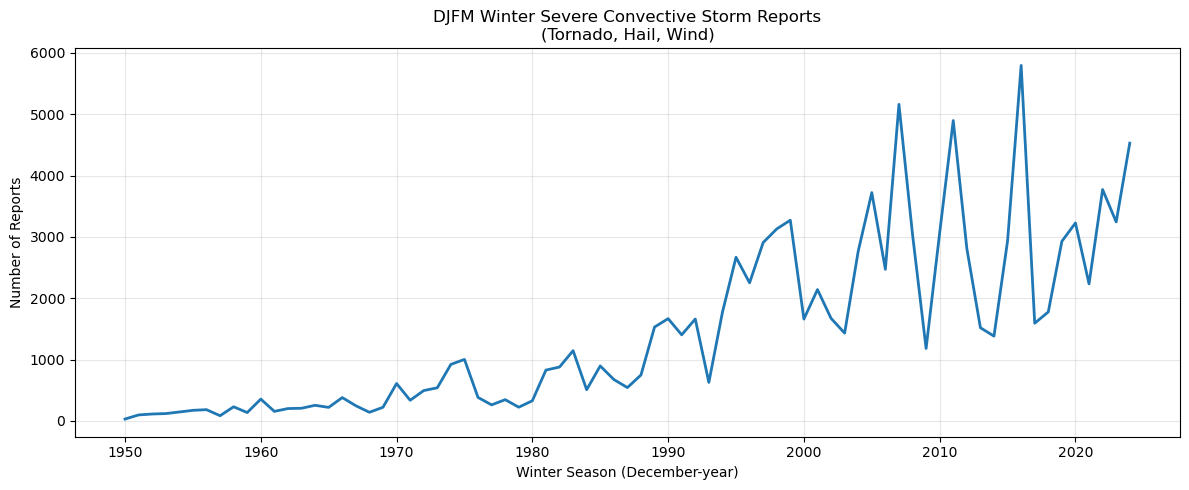

In [16]:
### Plotting total reports:
plt.figure(figsize=(12, 5))
plt.plot(winter_counts.index, winter_counts.values, lw=2)
plt.xlabel("Winter Season (December-year)")
plt.ylabel("Number of Reports")
plt.title("DJFM Winter Severe Convective Storm Reports\n(Tornado, Hail, Wind)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [17]:
### Grouping by both season and event type
winter_type_counts = (
    df_winter_scs
    .groupby(["WINTER_SEASON", "EVENT_TYPE"])
    .size()
    .unstack(fill_value=0)
)

In [18]:
winter_type_counts

EVENT_TYPE,Hail,Thunderstorm Wind,Tornado
WINTER_SEASON,,,
1950,0,0,31
1951,0,0,98
1952,0,0,113
1953,0,0,120
1954,38,48,60
...,...,...,...
2020,829,1852,547
2021,372,1417,446
2022,1143,2096,534


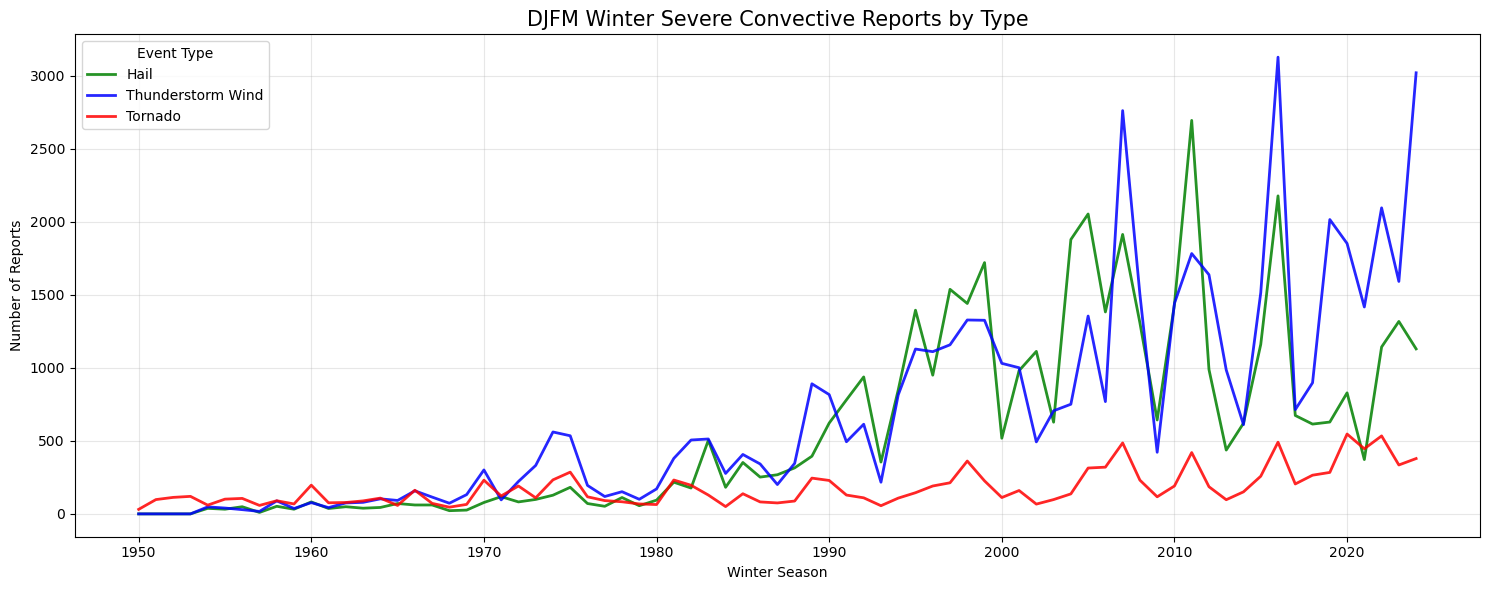

In [19]:
color_map = {
    "Tornado": "red",
    "Hail": "green",
    "Thunderstorm Wind": "blue",
}

fig, ax = plt.subplots(figsize=(15, 6))

for col in winter_type_counts.columns:
    ax.plot(
        winter_type_counts.index,
        winter_type_counts[col],
        label=col,
        color=color_map[col],
        alpha=0.85,
        linewidth=2
    )

ax.set_xlabel("Winter Season")
ax.set_ylabel("Number of Reports")
ax.set_title("DJFM Winter Severe Convective Reports by Type", fontsize=15)
ax.grid(alpha=0.3)
ax.legend(title="Event Type")

plt.tight_layout()
plt.show()


Clear bias in hail and wind, but less so for tornado. Perhaps can detrend based on the ratio of hail/wind to tornado? Verisk detrended by using the more recent period as an anchor point to remove reporting/tech biases but wouldn't this remove any longer term climate change based trend

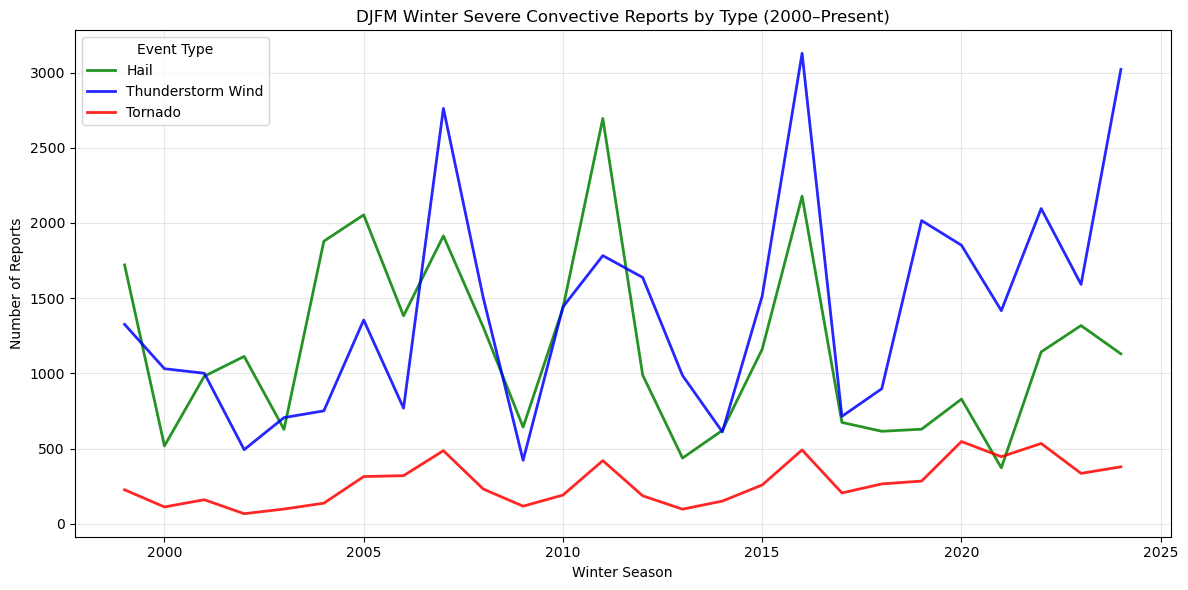

In [20]:
### Zooming in into 1999-2024 (to compare to preliminary reports)
winter_2000 = winter_type_counts.loc[1999:]

fig, ax = plt.subplots(figsize=(12, 6))

for col in winter_2000.columns:
    ax.plot(
        winter_2000.index,
        winter_2000[col],
        label=col,
        color=color_map[col],
        linewidth=2,
        alpha=0.85
    )

ax.set_xlabel("Winter Season")
ax.set_ylabel("Number of Reports")
ax.set_title("DJFM Winter Severe Convective Reports by Type (2000–Present)")
ax.grid(alpha=0.3)
ax.legend(title="Event Type")

plt.tight_layout()
plt.show()


In [21]:
winter_2000

EVENT_TYPE,Hail,Thunderstorm Wind,Tornado
WINTER_SEASON,,,
1999,1721,1326,226
2000,518,1031,112
2001,981,1001,160
2002,1113,493,67
2003,628,706,98
2004,1879,751,137
2005,2054,1355,314
2006,1383,769,320
2007,1914,2762,486


In [25]:
sig = df_winter_scs[
    ((df_winter_scs["EVENT_TYPE"] == "Hail") & (df_winter_scs["MAGNITUDE"] >= 2.0)) |
    ((df_winter_scs["EVENT_TYPE"] == "Thunderstorm Wind") & (df_winter_scs["MAGNITUDE"] >= 65))
]


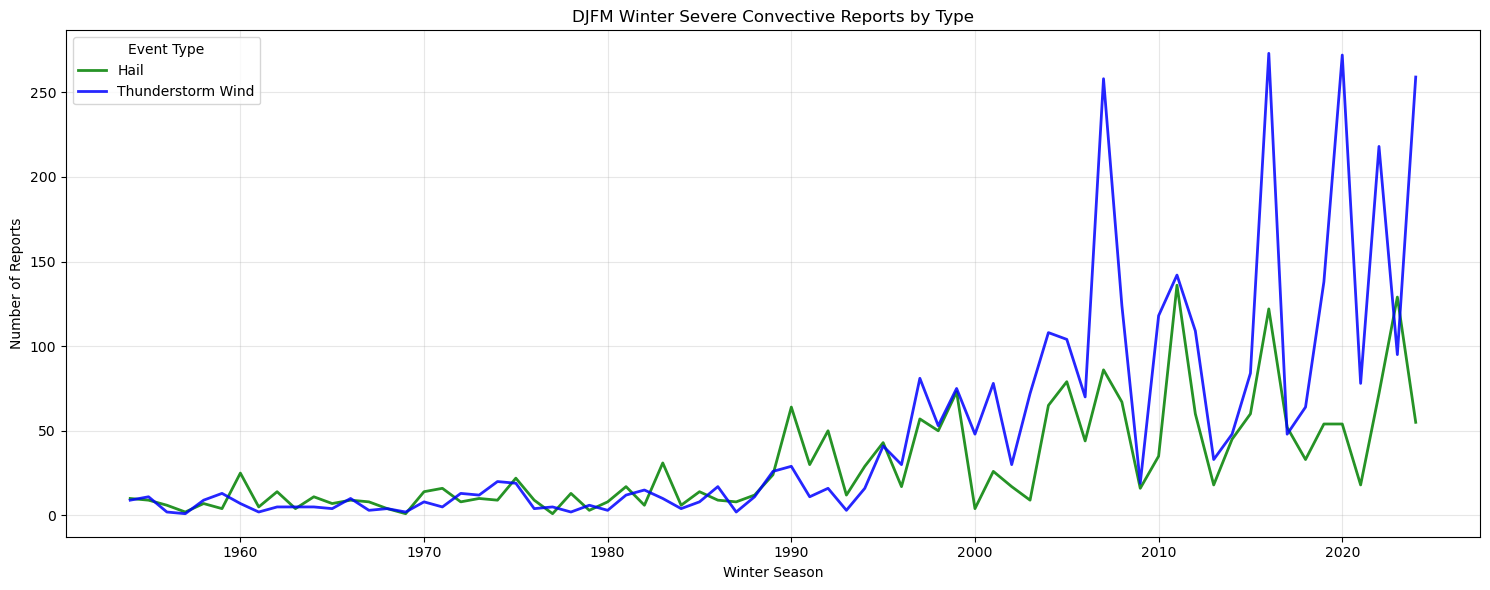

In [26]:
sig_winter_type_counts = (
    sig
    .groupby(["WINTER_SEASON", "EVENT_TYPE"])
    .size()
    .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(15, 6))

for col in sig_winter_type_counts.columns:
    ax.plot(
        sig_winter_type_counts.index,
        sig_winter_type_counts[col],
        label=col,
        color=color_map[col],
        alpha=0.85,
        linewidth=2
    )

ax.set_xlabel("Winter Season")
ax.set_ylabel("Number of Reports")
ax.set_title("DJFM Winter Severe Convective Reports by Type (Filtered by Extreme Wind (>=65 knots) and Hail")
ax.grid(alpha=0.3)
ax.legend(title="Event Type")

plt.tight_layout()
plt.show()


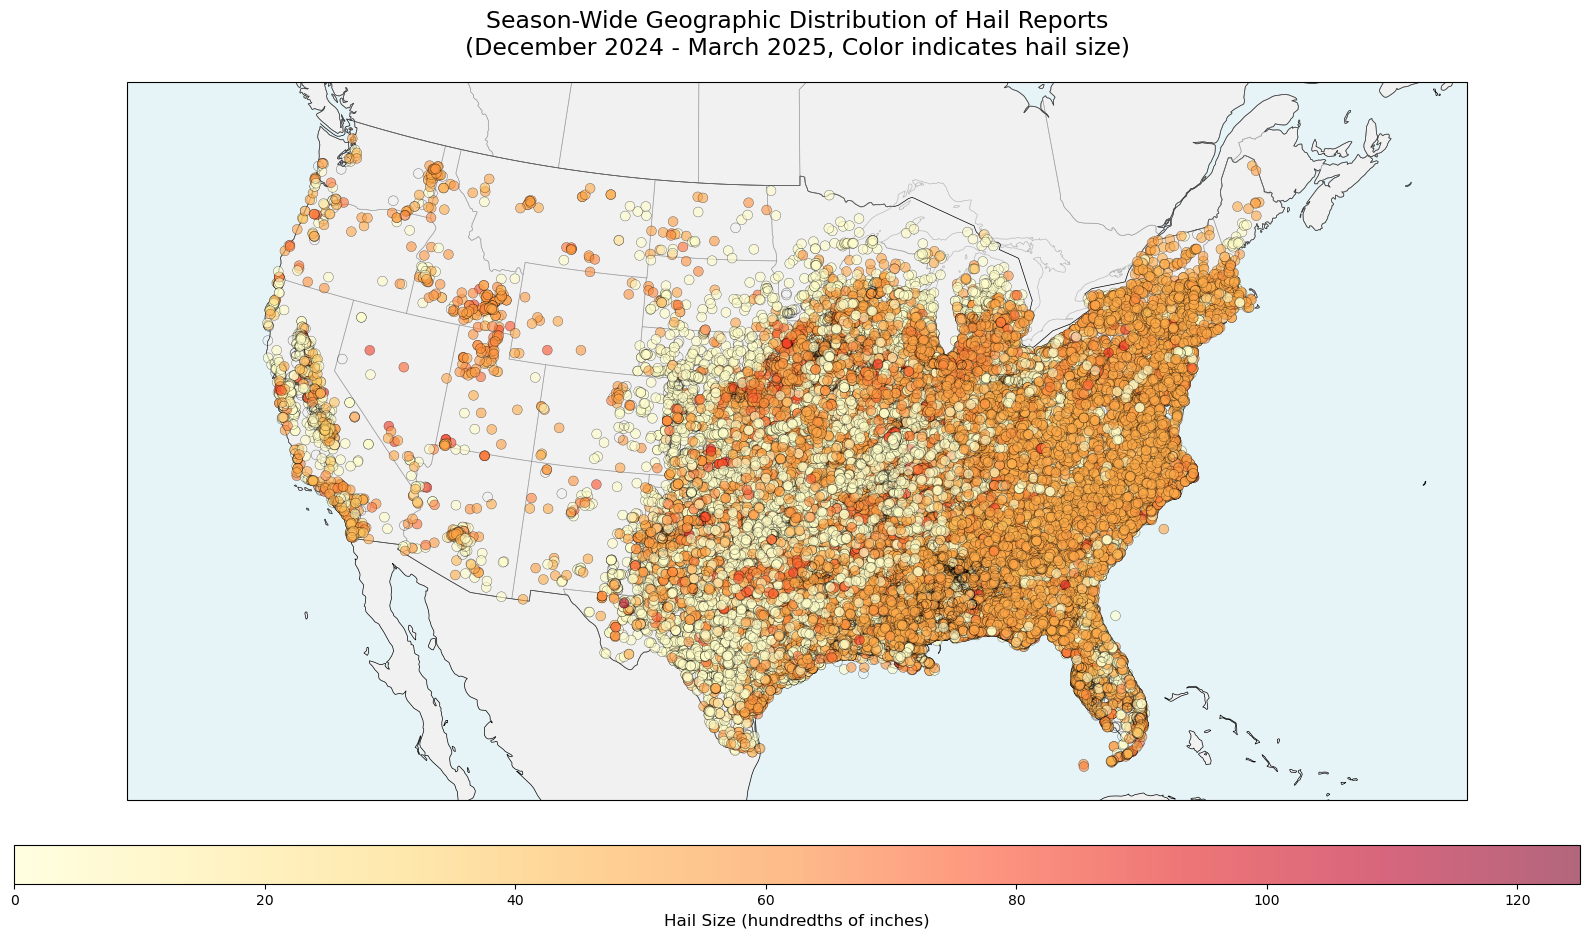

In [27]:
# Geographic scatter plot - Season-wide locations colored by hail size (Cartopy map)
hail = df_winter_scs[(df_winter_scs["EVENT_TYPE"] == "Hail")].sel(

fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-96, central_latitude=37.5))

# Set extent to cover continental US
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray', alpha=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

# Plot scatter points colored by hail size
scatter = ax.scatter(df_winter_scs['BEGIN_LON'], df_winter_scs['BEGIN_LAT'], 
                    c=df_winter_scs['MAGNITUDE'], 
                    cmap='YlOrRd', s=50, alpha=0.6, 
                    edgecolors='black', linewidth=0.3,
                    transform=ccrs.PlateCarree(), zorder=10)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, aspect=40)
cbar.set_label('Hail Size (hundredths of inches)', fontsize=12)

ax.set_title('Season-Wide Geographic Distribution of Hail Reports\n(December 2024 - March 2025, Color indicates hail size)', 
            fontsize=17, pad=20)
plt.tight_layout()
plt.show()


### Isolating 2010 in order to compare to preliminary reports:

In [14]:
df_winter_scs.loc[df_winter_scs['WINTER_SEASON'] == 2010].groupby('EVENT_TYPE').size()

EVENT_TYPE
Hail                 1435
Thunderstorm Wind    1442
Tornado               191
dtype: int64

In [7]:
subset = df_winter_scs[df_winter_scs["WINTER_SEASON"] >= 1995]

In [8]:
subset.isna().sum()

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
BEGIN_TIME                0
END_YEARMONTH             0
END_DAY                   0
END_TIME                  0
EPISODE_ID                0
EVENT_ID                  0
STATE                     0
STATE_FIPS                0
YEAR                      0
MONTH_NAME                0
EVENT_TYPE                0
CZ_TYPE                   0
CZ_FIPS                   0
CZ_NAME                   0
WFO                       0
BEGIN_DATE_TIME           0
CZ_TIMEZONE               0
END_DATE_TIME             0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY       25302
DAMAGE_CROPS          33280
SOURCE                 7699
MAGNITUDE             11898
MAGNITUDE_TYPE        49895
FLOOD_CAUSE           85214
CATEGORY              85214
TOR_F_SCALE           77246
TOR_LENGTH            77246
TOR_WIDTH             77246
TOR_OTHER_WFO         84114
TOR_OTHER_CZ_STATE  

# Grouping/Clustering by Synoptic Case:

In [9]:
def create_synoptic_cases(df, gap_threshold_hours=12):
    """
    Groups NCEI Episodes into Synoptic Cases based on a time gap threshold.
    
    Args:
        df: The dataframe of storm reports.
        gap_threshold_hours: Hours of 'silence' required to start a new case.
                             12 hours is standard for synoptic separation.
                             6 hours is strict. 
                             72 hours is common for Reinsurance 'Event' clauses.
    """
    
    # 1. Isolate unique Episodes first
    # We group by EPISODE_ID to find the earliest start and latest start of that specific episode
    # (Using BEGIN_DT for both to keep it simple, or create END_DT if available)
    episodes = df.groupby('EPISODE_ID', as_index=False).agg({
        'BEGIN_DT_UTC': 'min', 
        'BEGIN_LAT': 'mean',
        'BEGIN_LON': 'mean'
    }).sort_values('BEGIN_DT_UTC')

    threshold = pd.Timedelta(hours=gap_threshold_hours)

    
     # 2. Walk forward in time, comparing to the *start* of the current case
    case_ids = []
    current_case_id = 0
    current_case_start = None

    for t in episodes['BEGIN_DT_UTC']:
        if current_case_start is None or (t - current_case_start) > threshold:
            # Start a new synoptic case
            current_case_id += 1
            current_case_start = t
        case_ids.append(current_case_id)

    episodes['SYNOPTIC_CASE_ID'] = case_ids

    # 3. Merge back to the full dataframe
    return df.merge(
        episodes[['EPISODE_ID', 'SYNOPTIC_CASE_ID']],
        on='EPISODE_ID',
        how='left',
    )


In [10]:
# --- Run the function ---
# A 12-hour gap is a solid meteorological definition for separating synoptic waves.
# If reports stop for 12 hours, the next report is likely a new system.
subset = create_synoptic_cases(subset, gap_threshold_hours=24)

print(f"Total Unique Episodes: {subset['EPISODE_ID'].nunique()}")
print(f"Total Synoptic Cases: {subset['SYNOPTIC_CASE_ID'].nunique()}")

Total Unique Episodes: 22051
Total Synoptic Cases: 1474


In [15]:
subset['SYNOPTIC_CASE_ID'].isna().sum()

np.int64(0)

In [16]:
subset['EVENT_ID'].unique().sum()

np.int64(185949811197)

In [17]:
subset['EVENT_TYPE'].unique()

array(['Thunderstorm Wind', 'Tornado', 'Hail'], dtype=object)

In [12]:
subset

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN_DT,WINTER_SEASON,SOURCE_FILE_YEAR,BEGIN_DT_UTC,SYNOPTIC_CASE_ID
0,199601,17,2250,199601,17,2250,2404529.0,5535851,TEXAS,48.0,...,31.5500,-97.1500,"The ""Best for Less"" hotel office roof was blow...",NaN,PDC,1996-01-17 22:50:00,1995,1996,1996-01-18 04:50:00+00:00,6
1,199601,18,845,199601,18,850,1000285.0,5535517,TENNESSEE,47.0,...,36.0200,-88.9700,Two homes were damaged and 18 golf cart houses...,NaN,PDC,1996-01-18 08:45:00,1995,1996,1996-01-18 14:45:00+00:00,6
2,199601,18,1100,199601,18,1100,1000504.0,5535339,ILLINOIS,17.0,...,40.3200,-89.0700,"Thunderstorm winds destroyed a large shed, ble...",NaN,PDC,1996-01-18 11:00:00,1995,1996,1996-01-18 17:00:00+00:00,6
3,199603,25,120,199603,25,125,2403732.0,5548791,INDIANA,18.0,...,39.9200,-87.0700,NaN,NaN,PDC,1996-03-25 01:20:00,1995,1996,1996-03-25 06:20:00+00:00,18
4,199601,18,410,199601,18,410,2404475.0,5538789,ARKANSAS,5.0,...,34.5700,-92.5800,A home in Benton sustained roof damage.,NaN,PDC,1996-01-18 04:10:00,1995,1996,1996-01-18 10:10:00+00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85209,202503,30,2320,202503,30,2320,206867.0,1290825,KENTUCKY,21.0,...,38.1571,-83.3841,A deep low pressure system (including a surfac...,Powerlines were reported to have blown down at...,CSV,2025-03-30 23:20:00,2024,2025,2025-03-31 03:20:00+00:00,775
85210,202503,31,20,202503,31,20,206867.0,1290828,KENTUCKY,21.0,...,37.1871,-83.7779,A deep low pressure system (including a surfac...,A tree was reported to have been blown down ne...,CSV,2025-03-31 00:20:00,2024,2025,2025-03-31 04:20:00+00:00,775
85211,202503,31,119,202503,31,119,206867.0,1290851,KENTUCKY,21.0,...,37.3389,-82.5863,A deep low pressure system (including a surfac...,Powerlines were reported to have been blown do...,CSV,2025-03-31 01:19:00,2024,2025,2025-03-31 05:19:00+00:00,775
85212,202503,27,200,202503,27,200,200858.0,1249986,TEXAS,48.0,...,26.0711,-97.1590,Several rounds of showers and thunderstorms pu...,"The C-MAN station at Brazos Santiago, just ins...",CSV,2025-03-27 02:00:00,2024,2025,2025-03-27 07:00:00+00:00,775


In [11]:
def create_case_stats(df):
    """
    Create a new dataframe of synoptic case statistics to analyze
    """
    
    case_stats = df.groupby('SYNOPTIC_CASE_ID').agg({
    'WINTER_SEASON': 'first',             # The season this case belongs to
    'BEGIN_DT': ['min', 'max'],           # Start/End times
    'EVENT_TYPE': 'count',                # Total reports
    'BEGIN_LAT': 'mean',                  # Centroid Lat
    'BEGIN_LON': 'mean',                  # Centroid Lon
    'EVENT_ID': 'nunique'                 # Double check unique events
})
    
    case_stats.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in case_stats.columns.values]
    case_stats = case_stats.rename(columns={'WINTER_SEASON_first': 'Season', 'EVENT_TYPE_count': 'Report_Count'})
    
    # Calculate Duration (in Hours)
    case_stats['Duration_Hrs'] = (case_stats['BEGIN_DT_max'] - case_stats['BEGIN_DT_min']).dt.total_seconds() / 3600

    print(f"Total Synoptic Cases: {len(case_stats)}")
    
    return case_stats

In [12]:
case_stats = create_case_stats(subset)

Total Synoptic Cases: 1474


In [19]:
episode_stats = (
    subset
    .groupby('EPISODE_ID', as_index=False)
    .agg({
        'WINTER_SEASON': 'first',
        'BEGIN_DT_UTC': ['min', 'max'],
        'EVENT_ID': 'nunique',
        'STATE': 'nunique',       # optional: how many states per episode
        'WFO': 'nunique'          # optional: how many WFOs per episode
    })
)
episode_stats.columns = [
    'EPISODE_ID',
    'Season',
    'BEGIN_UTC_min',
    'BEGIN_UTC_max',
    'EVENT_ID_nunique',
    'STATE_nunique',
    'WFO_nunique',
]

# Duration in hours
episode_stats['Duration_Hrs'] = (
    (episode_stats['BEGIN_UTC_max'] - episode_stats['BEGIN_UTC_min'])
    .dt.total_seconds() / 3600
)

In [20]:
# Top 20 longest episodes
episode_stats_long = episode_stats.sort_values('Duration_Hrs', ascending=False)
episode_stats_long.head(20)

,EPISODE_ID,Season,BEGIN_UTC_min,BEGIN_UTC_max,EVENT_ID_nunique,STATE_nunique,WFO_nunique,Duration_Hrs
15952,1502274.0,1998,1999-01-01 23:10:00+00:00,1999-01-30 03:00:00+00:00,30,1,1,675.833333
19988,2072035.0,1997,1998-01-06 23:10:00+00:00,1998-01-31 23:30:00+00:00,11,1,1,600.333333
20771,2074078.0,1997,1998-03-07 13:10:00+00:00,1998-03-31 03:25:00+00:00,44,1,1,566.250000
20333,2073175.0,1997,1998-02-06 02:54:00+00:00,1998-02-26 10:20:00+00:00,35,1,1,487.433333
15607,1501256.0,1998,1999-03-08 20:25:00+00:00,1999-03-28 10:35:00+00:00,21,1,1,470.166667
15289,1500293.0,1998,1999-03-05 21:50:00+00:00,1999-03-25 04:55:00+00:00,36,1,1,463.083333
20093,2072393.0,1997,1998-01-07 16:25:00+00:00,1998-01-22 21:15:00+00:00,3,1,1,364.833333
21934,2405274.0,1998,1999-03-13 04:20:00+00:00,1999-03-28 06:51:00+00:00,4,1,1,362.516667
21192,2076709.0,1997,1998-02-07 00:00:00+00:00,1998-02-19 20:30:00+00:00,3,1,1,308.500000
21138,2075805.0,1997,1998-03-07 07:35:00+00:00,1998-03-18 22:00:00+00:00,3,1,1,278.416667


### Inspecting Time series of synoptic cases:

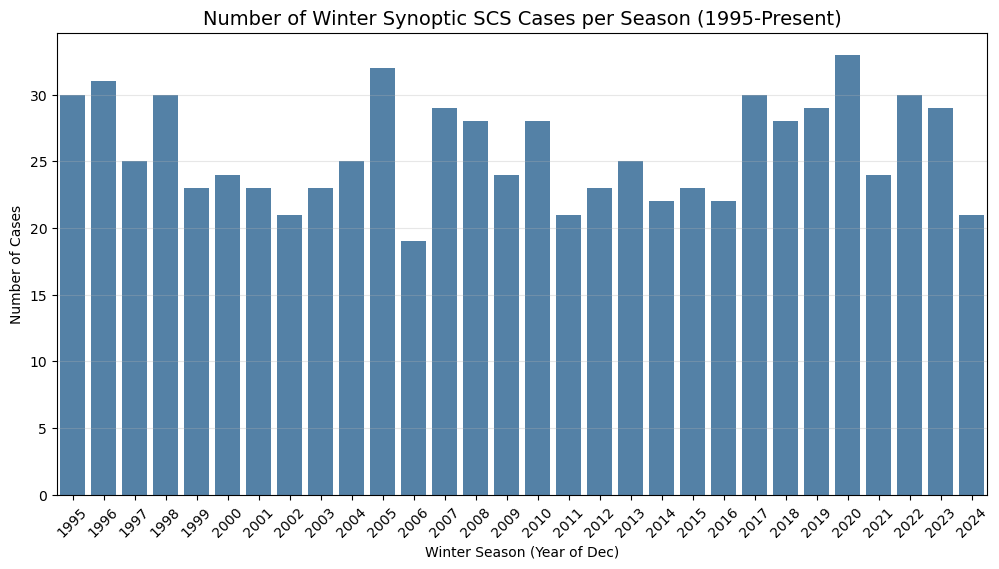

In [26]:
### Plotting time series of synoptic cases

fig = plt.figure(figsize=(12,6))

season_counts = case_stats['Season'].value_counts().sort_index()

##Plotting
ax = sns.barplot(x=season_counts.index, y=season_counts.values, color='steelblue')
plt.title("Number of Winter Synoptic SCS Cases per Season (1995-Present)", fontsize=14)
plt.ylabel("Number of Cases")
plt.xlabel("Winter Season (Year of Dec)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

In [27]:
case_stats.iloc[770]

WINTER_SEASON  first                     2024
BEGIN_DT       min        2025-03-12 16:22:00
               max        2025-03-19 10:54:00
EVENT_TYPE     count                     1653
BEGIN_LAT      mean                 38.395211
BEGIN_LON      mean                -87.092464
EVENT_ID       nunique                   1653
Name: 771, dtype: object

Ok looks reasonable. Now I'll repeat this for the entire dataframe to see how it looks when I use EVENT_ID instead of EPISODE_ID to deal with NaNs

In [27]:
# 1. Fill missing EPISODE_IDs with the EVENT_ID
# We cast to string to ensure matching types if your IDs are mixed
df_winter_scs['EPISODE_ID'] = df_winter_scs['EPISODE_ID'].fillna(df_winter_scs['EVENT_ID'])

# 2. Ensure consistency (Sometimes NCEI mixes strings and integers)
# It is safer to treat IDs as strings to prevent merge errors
df_winter_scs['EPISODE_ID'] = df_winter_scs['EPISODE_ID'].astype(str)

In [49]:
full_df = create_synoptic_cases(df_winter_scs, gap_threshold_hours=72)

In [50]:
full_case_stats = create_case_stats(full_df)

Total Synoptic Cases: 786


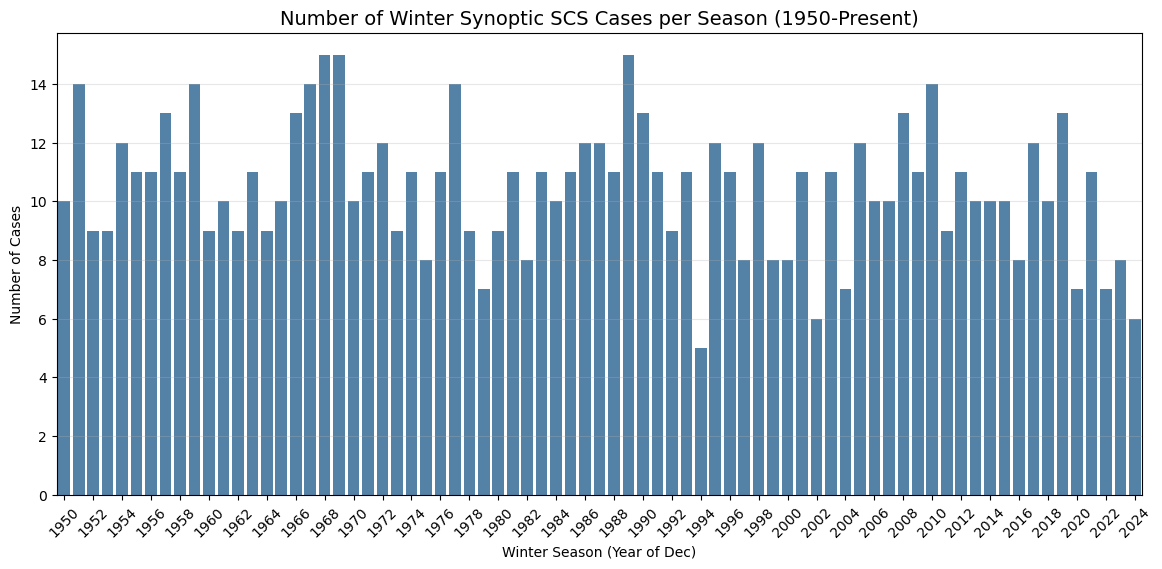

In [51]:
fig = plt.figure(figsize=(14,6))

season_counts = full_case_stats['Season'].value_counts().sort_index()

##Plotting
ax = sns.barplot(x=season_counts.index, y=season_counts.values, color='steelblue')
ax.set_title("Number of Winter Synoptic SCS Cases per Season (1950-Present)", fontsize=14)
ax.set_ylabel("Number of Cases")
ax.set_xlabel("Winter Season (Year of Dec)")
#plt.xticks(rotation=45)

ax.set_xticks(ax.get_xticks()[::2])
ax.tick_params(axis='x', rotation=45)

plt.grid(axis='y', alpha=0.3)

In [53]:
case_stats

,Season,BEGIN_DT_min,BEGIN_DT_max,Report_Count,BEGIN_LAT_mean,BEGIN_LON_mean,EVENT_ID_nunique,Duration_Hrs
SYNOPTIC_CASE_ID,,,,,,,,
1,1995,1996-01-01 12:25:00,1996-01-03 08:40:00,25,31.232000,-82.268000,25,44.250000
2,1995,1996-01-06 04:30:00,1996-01-06 04:30:00,1,31.180000,-92.550000,1,0.000000
3,1995,1996-01-07 06:15:00,1996-01-07 06:15:00,1,25.900000,-80.230000,1,0.000000
4,1995,1996-01-11 18:35:00,1996-01-12 04:50:00,5,31.988000,-83.966000,5,10.250000
5,1995,1996-01-15 03:00:00,1996-01-15 03:00:00,6,44.766667,-123.670000,6,0.000000
...,...,...,...,...,...,...,...,...
771,2024,2025-03-12 16:22:00,2025-03-19 10:54:00,1653,38.395211,-87.092464,1653,162.533333
772,2024,2025-03-19 02:07:00,2025-03-20 16:48:00,206,39.983962,-87.314809,206,38.683333
773,2024,2025-03-21 18:00:00,2025-03-24 09:50:00,194,32.800131,-93.383861,194,63.833333


## Inspecting characteristics of a single case:

In [52]:
top_cases = case_stats.nlargest(4, 'Report_Count').index.to_list()
top_cases

[272, 428, 771, 407]